# Senegal


---
classification comparing groundtruth against dynamic layer 
---



## Install libraries 

In [ ]:

!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install geemap



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.2 MB/s 
     |████████████████████████████████| 16.7 MB 455 kB/s 
     |████████████████████████████████| 6.3 MB 40.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 8.2 MB/s 
     |████████████████████████████████| 1.3 MB 44.0 MB/s 
     |████████████████████████████████| 198 kB 48.7 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 99 kB 8

In [ ]:
import requests
import zipfile
%matplotlib inline
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import ee
import geemap

## Connect with drive and GEE 

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=wYP3xlQ-oyPzqxPHQ2ucaUToucZblRh0spz4V26cuIg&tc=eJ5bysXA5-j_rxZfoXGTe26rmUdtSA2IxttaSqXsBpk&cc=lAXurPyNJSGvUfKIyQjj6jtvSJ2ZZ31lVhcv8Jm5xvU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ARtbsJoTdFVHw4uXCb5PKZDoF-MCgeENpd5b3ZwH1NwwQPl4D25SrghnREI

Successfully saved authorization token.


In [ ]:
Map = geemap.Map(center=(14.6937000, -17.4440600), zoom=6)
Map.add_basemap('HYBRID')
Map


Map(center=[14.6937, -17.44406], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(c…

In [ ]:
# Set the region of interest by simply drawing a polygon on the map
#region = Map.user_roi
region = ee.FeatureCollection("FAO/GAUL/2015/level0").filter(ee.Filter.eq('ADM0_NAME', "Senegal"))
#if region is None:
#    region = ee.Geometry.BBox(-89.7088, 42.9006, -89.0647, 43.2167)

Map.centerObject(region)

In [ ]:
# Set the date range
start_date = '2019-08-01'
end_date = '2019-10-30'

In [ ]:
# Create a Sentinel-2 image composite
image = geemap.dynamic_world_s2(region, start_date, end_date)
vis_params = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}
Map.addLayer(image, vis_params, 'Sentinel-2 image')

In [ ]:
# Create Dynamic World land cover composite
landcover = geemap.dynamic_world(region, start_date, end_date, return_type='class')
Map.addLayer(landcover, {}, 'Land Cover')

In [ ]:

in_fc = geemap.shp_to_ee('drive/My Drive/data/senegal_east.shp')
Map.addLayer(in_fc, {}, 'year')
#Map

In [ ]:
images = geemap.dynamic_world_timeseries(
    region, start_date, end_date, return_type="class"
)
vis_params = {
    "min": 0,
    "max": 8,
    "palette": [
        "#419BDF",
        "#397D49",
        "#88B053",
        "#7A87C6",
        "#E49635",
        "#DFC35A",
        "#C4281B",
        "#A59B8F",
        "#B39FE1",
    ],
}
#Map.addLayer(images.first(), vis_params, 'First image')
Map.addLayer(images.mosaic(), vis_params, 'First image')
Map.add_legend(title="Dynamic World Land Cover", builtin_legend='Dynamic_World')
Map

Map(bottom=30400.0, center=[14.498508149446216, -14.436035156250002], controls=(WidgetControl(options=['positi…

In [ ]:
#to save the class pixel associated to the field boundary 
image2 = images.first()
geemap.extract_values_to_points(in_fc, image2, 'drive/My Drive/east_2021.shp', scale=10)

Generating URL ...
Please wait ...
Data downloaded to /content/drive/My Drive/east_2021.shp


In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import glob
import os

In [ ]:
path = os.getcwd()
path

'/content'

In [ ]:
files = glob.glob('drive/My Drive/data/senegal_csv/*.csv')
dfs =[]
for file in files:
  table = pd.read_csv(file)
  string = os.path.basename(file)
  pos, yearDyn = string.split('.')[0].split('_')[0:]
  table = table.assign(pos=pos, yearDyn=yearDyn)
  dfs.append(table)
  results = pd.concat(dfs)
  results.to_csv('drive/My Drive/data/senegal_csv/senegal_results_dyn.csv')
  #print(table)



In [ ]:
data = pd.read_csv('drive/My Drive/data/senegal_csv/senegal_results_dyn_6classes.csv')
data

,WKT,SiteName,LCLUTypes,year,EOS,Intercrop,Irrigated,DataSource,Area_ha,AcquiDate,LandCover,SOS,Country,CropType1,dynanic,groundTruth,pos
0,MULTIPOLYGON (((-16.6596344492008 14.415437104...,Tattaguine,1,2021,NaN,NaN,NaN,0.0,3.860,11/15/21,Built-up surface,NaN,Senegal,31,6,6,west
1,MULTIPOLYGON (((-16.4866523934344 14.448455338...,Tattaguine,1,2021,NaN,NaN,NaN,0.0,29.081,11/15/21,Built-up surface,NaN,Senegal,31,6,6,west
2,MULTIPOLYGON (((-16.4886451750716 14.410219039...,Tattaguine,1,2021,NaN,NaN,NaN,0.0,0.701,11/15/21,Built-up surface,NaN,Senegal,31,6,6,west
3,MULTIPOLYGON (((-16.6248841510298 14.345589060...,Tattaguine,1,2021,NaN,NaN,NaN,0.0,6.361,11/15/21,Built-up surface,NaN,Senegal,31,6,6,west
4,MULTIPOLYGON (((-16.6362007383772 14.433870145...,Tattaguine,1,2021,NaN,NaN,NaN,0.0,2.726,11/15/21,Built-up surface,NaN,Senegal,31,6,6,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8083,MULTIPOLYGON (((-14.0155503407198 13.737951031...,Koussanar,8,2021,11/30/21,0.0,1.0,0.0,6.733,10/15/21,Cropland,7/1/21,Senegal,8,4,4,east
8084,MULTIPOLYGON (((-13.9995314142319 13.821206640...,Koussanar,8,2021,11/30/21,0.0,1.0,0.0,0.092,10/15/21,Cropland,7/1/21,Senegal,24,4,4,east
8085,MULTIPOLYGON (((-13.9987033618019 13.822194116...,Koussanar,8,2021,11/30/21,0.0,1.0,0.0,0.223,10/15/21,Cropland,7/1/21,Senegal,24,4,4,east
8086,MULTIPOLYGON (((-15.7745046294174 13.717951674...,Nioro,8,2018,11/30/18,0.0,1.0,0.0,1.649,10/15/18,Cropland,7/1/18,Senegal,28,4,4,central


In [ ]:
from sklearn.metrics import confusion_matrix
y_true = data[['groundTruth']]
y_pred = data[['dynanic']]
confusion_matrix(y_true, y_pred)


array([[   1,    1,   15,   82,    0,   45],
       [   0,    1,   20,   75,    6,    3],
       [   0,   22, 2487, 2086,   72, 2414],
       [   0,    8,   50,  265,    5,   19],
       [   0,    0,    0,    9,  270,    0],
       [   0,    1,   33,   31,   10,   57]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['water', 'trees', 'crops', 'shrub', 'builtUp', 'bareSoil']
labels = ['0','1','4','5','6','7']
print(classification_report(y_true, y_pred, target_names=target_names))



              precision    recall  f1-score   support

       water       1.00      0.01      0.01       144
       trees       0.03      0.01      0.01       105
       crops       0.95      0.35      0.51      7081
       shrub       0.10      0.76      0.18       347
     builtUp       0.74      0.97      0.84       279
    bareSoil       0.02      0.43      0.04       132

    accuracy                           0.38      8088
   macro avg       0.48      0.42      0.27      8088
weighted avg       0.88      0.38      0.49      8088



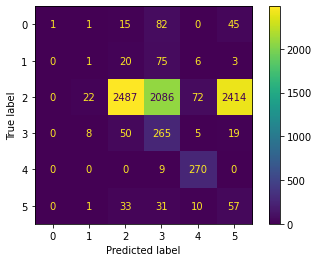

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
baa = balanced_accuracy_score(y_true, y_pred)
kappa = cohen_kappa_score(y_true, y_pred)
matt = matthews_corrcoef(y_true, y_pred)
print(baa, kappa, matt)

0.42182311849171056 0.11280508664116551 0.1967771801656036


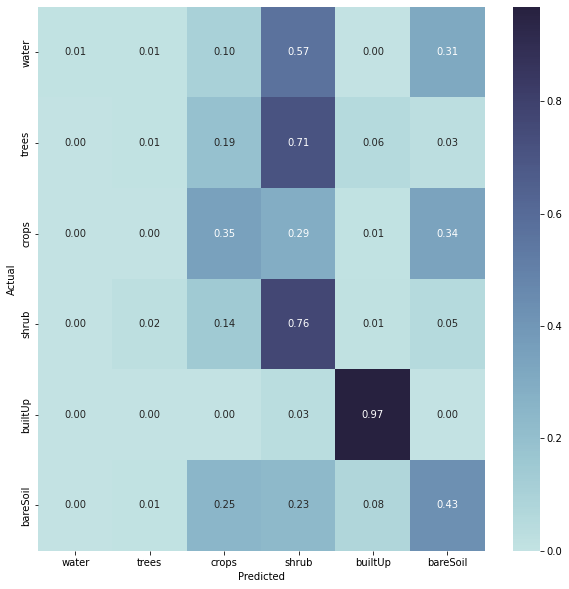

In [ ]:
import seaborn as sns
import numpy as np
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
color = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
matrix = sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names, cmap=color)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [ ]:
fig = matrix.get_figure()
fig.savefig("drive/My Drive/data/senegal_csv/Norm_matrix.png") 